# Algorithm : Top Down 

<h5>Description:</h5>
<ul>
<li>The Top-Down Algorithm is a recursive method for segmenting time series data into subseries.</li>
<li>It starts with the entire time series and recursively divides it into segments until certain stopping criteria are met.</li>
<li>The stopping criteria can be based on the number of segments desired, a minimum segment length, or other user-defined conditions.</li>
<li>At each step, the algorithm selects the best split point to divide the time series into two segments based on a specified criterion, such as minimizing the variance within segments.</li>
<li>It continues this process iteratively on each segment until the stopping criteria are satisfied.</li>
<li>The result is a segmentation of the original time series into smaller segments that capture the underlying patterns or changes in the data.</li>
</ul>

<h3>Importing the necessary libraries</h3>

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h3>Define Functions</h3>

In [181]:
def read_data_from_txt_file(file_path):
    try:
        with open(file_path, "r") as file:
            lines = file.readlines()
            data = [float(line.strip()) for line in lines if line.strip()]
        xs = np.arange(len(data))
        ys = np.array(data)
        return xs, ys
    except FileNotFoundError:
        print("File not found.")
        return None, None
    except Exception as e:
        print("Error reading data:", e)
        return None, None


def read_data_from_csv_file(file_path, target_name):
    try:
        df = pd.read_csv(file_path)
        xs = np.arange(len(df))
        ys = df[target_name].values
        return xs, ys
    except FileNotFoundError:
        print("File not found.")
        return None, None
    except Exception as e:
        print("Error reading data:", e)
        return None, None

In [182]:
def improvement_splitting_here(T, i):
    # Calculate the improvement in approximation by splitting at index i
    # For simplicity, let's assume the improvement is the difference between the segments' means
    left_mean = np.mean(T[:i])
    right_mean = np.mean(T[i:])
    return abs(right_mean - left_mean)


def calculate_error(T):
    # Calculate the error for a segment
    return np.std(T)

In [183]:
def top_down(T, max_error):
    if len(T) <= 2:
        return [T]

    best_so_far = float("inf")
    breakpoint = None

    for i in range(2, len(T) - 1):
        improvement_in_approximation = improvement_splitting_here(T, i)
        if improvement_in_approximation < best_so_far:
            breakpoint = i
            best_so_far = improvement_in_approximation

    if breakpoint is None:
        return [T]

    left_segment = T[:breakpoint]
    right_segment = T[breakpoint:]

    seg_ts = []
    if calculate_error(left_segment) > max_error:
        seg_ts.extend(top_down(left_segment, max_error))
    else:
        seg_ts.append(left_segment)

    if calculate_error(right_segment) > max_error:
        seg_ts.extend(top_down(right_segment, max_error))
    else:
        seg_ts.append(right_segment)

    return seg_ts

In [184]:
def plot_segmentation(T, segments):
    plt.figure(figsize=(12, 6))
    plt.plot(T, label="Original Time Series", color="b")
    temp = 0
    for segment in segments:
        temp += len(segment) 
        plt.axvline(x=temp, color="red", linestyle="--")

    plt.title("Time Series Segmentation using Top-Down")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()

<h3>Testing Algorithm on Weather Data</h3>

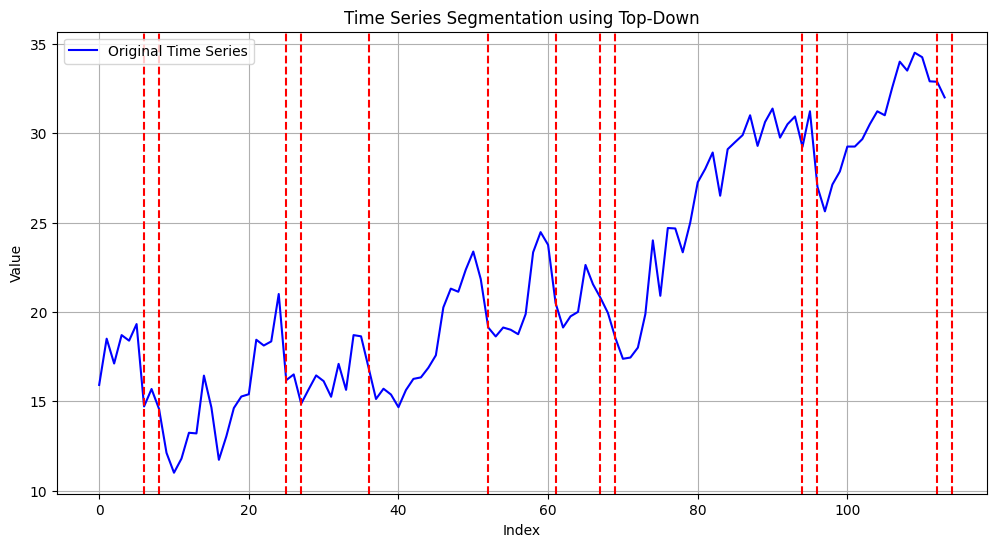

In [189]:
file_path = "../datasets/weather dataset/DailyDelhiClimateTest.csv"
X, T = read_data_from_csv_file(file_path, target_name="meantemp")

T = T[:300]
# Maximum error threshold
max_error = 4.7

# Perform segmentation using the sliding window approach
segments = top_down(T, max_error)
# print(T[:25])
# print(segments)
# Plot the time series
plot_segmentation(T, segments)